In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as tri

from math import gamma

# Визуализация

In [2]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [3]:
def draw_pdf_contours(pdf, title, nlevels=200, subdiv=8, **kwargs):
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.title(title)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    plt.show()


In [4]:
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]


def xy2bc(xy, tol=1.e-3):
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)


# Gumbel-Softmax

In [5]:
def pdf_gumbel_softmax(x, p_class, tau):
    return (gamma(len(p_class)) *
            np.power(tau, (len(p_class-1))) *
            np.power(p_class.dot(np.power(x, -tau)), -len(p_class)) *
            np.prod(np.power(x, -(tau + 1))))


# Примеры

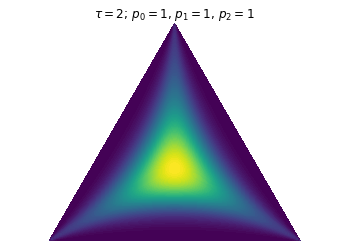

In [6]:
p_classes = np.array([1, 1, 1])
tau = 2
pdf = lambda x: pdf_gumbel_softmax(x, p_classes, tau)
title = r'$\tau = ' + str(tau) + '$; $p_0 = ' + str(p_classes[0]) + '$, $p_1 = ' + str(p_classes[1]) + '$, $p_2 = ' + str(p_classes[2]) + '$'
draw_pdf_contours(pdf, title, nlevels=100, subdiv=7)


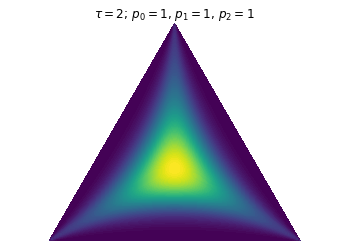

In [7]:
p_classes = np.array([1, 1, 1])
tau = 2
pdf = lambda x: pdf_gumbel_softmax(x, p_classes, tau)
title = r'$\tau = ' + str(tau) + '$; $p_0 = ' + str(p_classes[0]) + '$, $p_1 = ' + str(p_classes[1]) + '$, $p_2 = ' + str(p_classes[2]) + '$'
draw_pdf_contours(pdf, title, nlevels=100, subdiv=7)


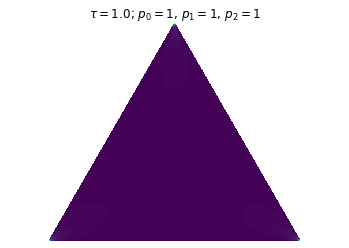

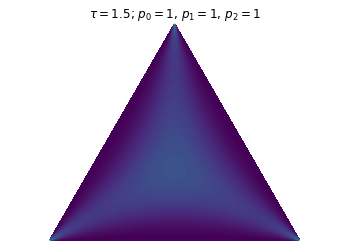

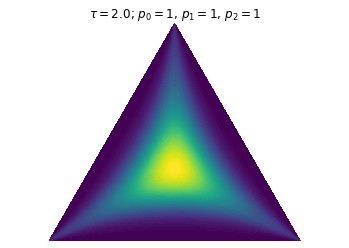

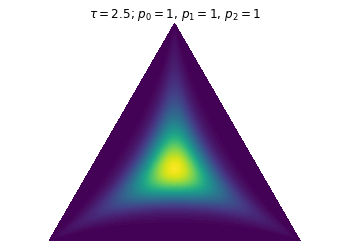

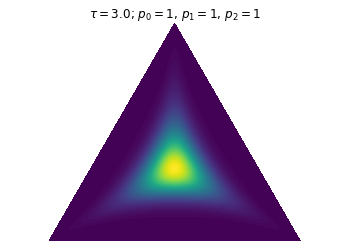

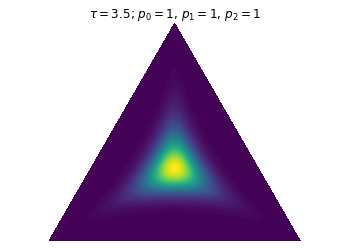

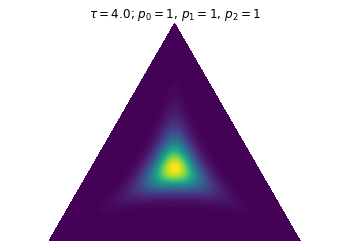

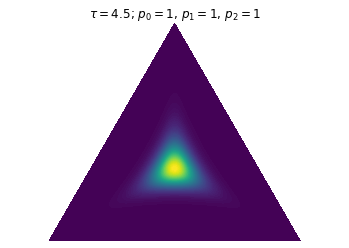

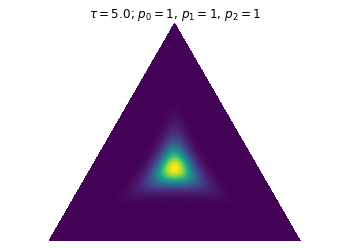

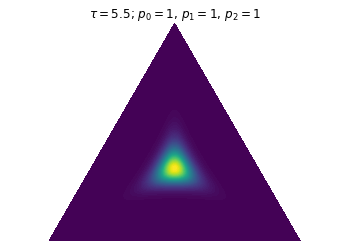

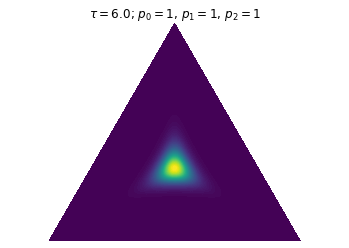

In [8]:
for tau in np.linspace(1, 6, 11):
    p_classes = np.array([1, 1, 1])
    pdf = lambda x: pdf_gumbel_softmax(x, p_classes, tau)
    title = r'$\tau = ' + str(tau) + '$; $p_0 = ' + str(p_classes[0]) + '$, $p_1 = ' + str(p_classes[1]) + '$, $p_2 = ' + str(p_classes[2]) + '$'
    draw_pdf_contours(pdf, title, nlevels=100, subdiv=7)


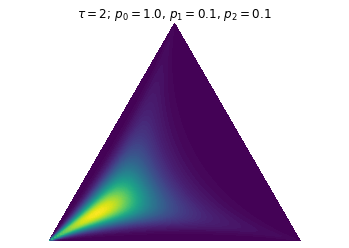

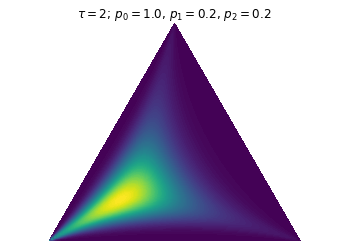

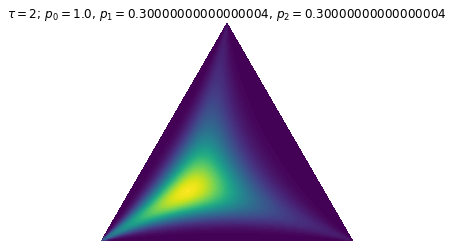

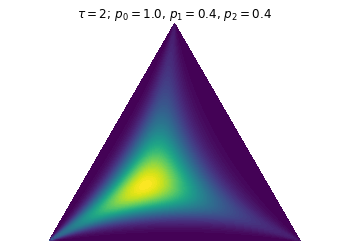

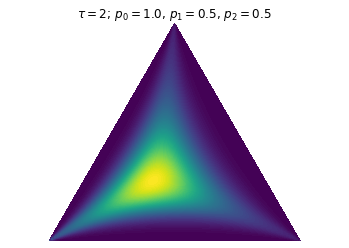

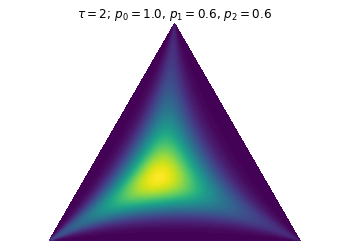

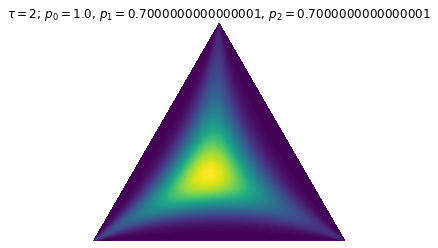

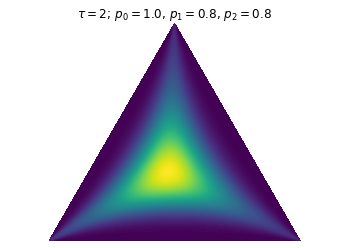

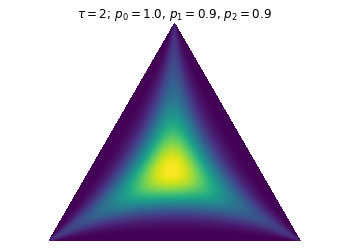

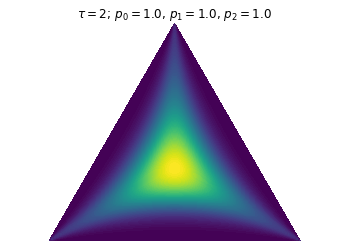

In [9]:
tau = 2
for p in np.linspace(0.1, 1, 10):
    p_classes = np.array([1, p, p])
    pdf = lambda x: pdf_gumbel_softmax(x, p_classes, tau)
    title = r'$\tau = ' + str(tau) + '$; $p_0 = ' + str(p_classes[0]) + '$, $p_1 = ' + str(p_classes[1]) + '$, $p_2 = ' + str(p_classes[2]) + '$'
    draw_pdf_contours(pdf, title, nlevels=100, subdiv=7)